# Complete Case Analysis

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df=pd.read_csv("dataSets/data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().sum().sort_values(ascending=True)

enrollee_id                  0
city                         0
relevent_experience          0
target                       0
experience                  65
enrolled_university        386
education_level            460
city_development_index     479
training_hours             766
major_discipline          2813
gender                    4508
company_size              5938
company_type              6140
dtype: int64

In [11]:
(df.isnull().sum()/df.shape[0])*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [13]:
list=[var for var in df.columns if (df[var].isnull().sum()/df.shape[0])*100 <5 and (df[var].isnull().sum()/df.shape[0])*100 > 0]
list

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [16]:
df[list].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13919,0.745,Full time course,Graduate,10.0,39.0
15263,0.698,Full time course,Graduate,7.0,196.0
9477,0.624,Full time course,Masters,2.0,48.0
4946,0.920,no_enrollment,Masters,0.0,73.0
16596,0.939,no_enrollment,Masters,20.0,13.0


In [25]:
# Assuming 'list' contains the filtered column names
dtypes = {var: df[var].dtype for var in list}

# Display the dictionary of data types
dtypes

{'city_development_index': dtype('float64'),
 'enrolled_university': dtype('O'),
 'education_level': dtype('O'),
 'experience': dtype('float64'),
 'training_hours': dtype('float64')}

In [34]:
cols_numerical=[num for num in list if df[num].dtype!='object']
print("numerical Data :",cols_numerical)
cols_categorical=[num for num in list if df[num].dtype=='object']
print("Categorical Data :",cols_categorical)


numerical Data : ['city_development_index', 'experience', 'training_hours']
Categorical Data : ['enrolled_university', 'education_level']


In [36]:
df_new=df[cols_numerical].dropna()
df_new.shape, df.shape

((17865, 3), (19158, 13))

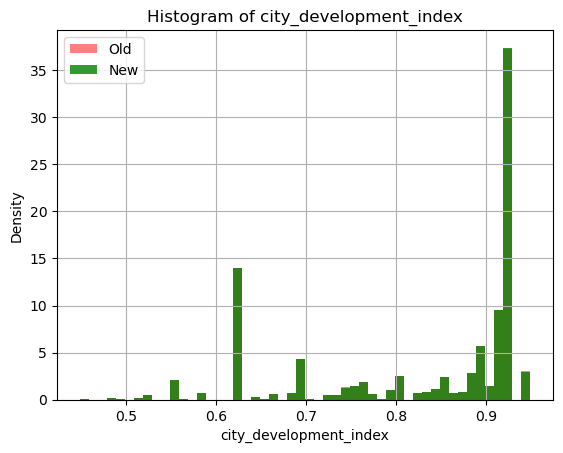

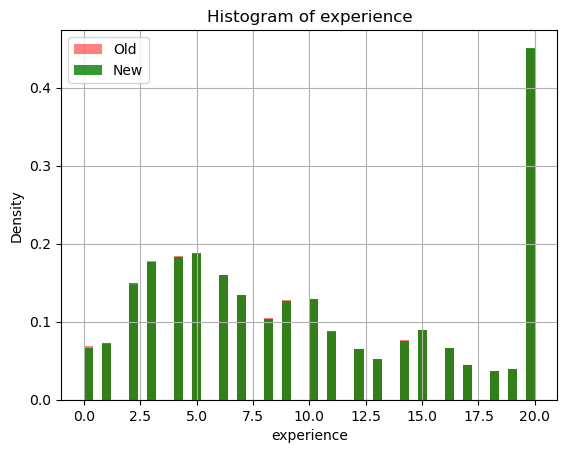

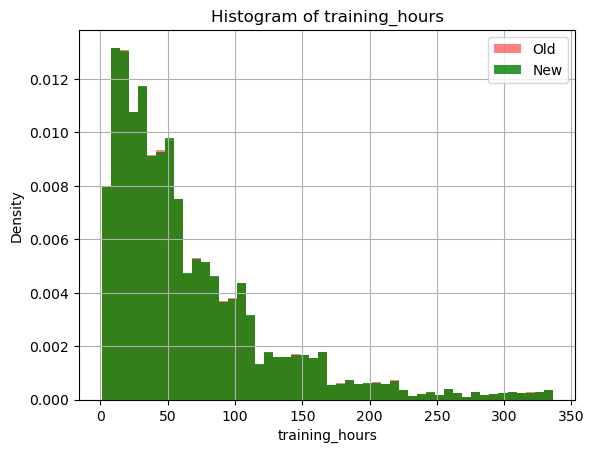

In [46]:
import matplotlib.pyplot as plt

def plot_new_old(df_old_one, df_new_one, column):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot histogram for the old DataFrame
    df_old_one[column].hist(bins=50, ax=ax, density=True, color='red', alpha=0.5, label='Old')
    
    # Plot histogram for the new DataFrame
    df_new_one[column].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8, label='New')

    # Adding labels and legend
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

    plt.show()

# Assuming cols_numerical is a list of numerical column names
for col in cols_numerical:
    plot_new_old(df, df_new, column=col)


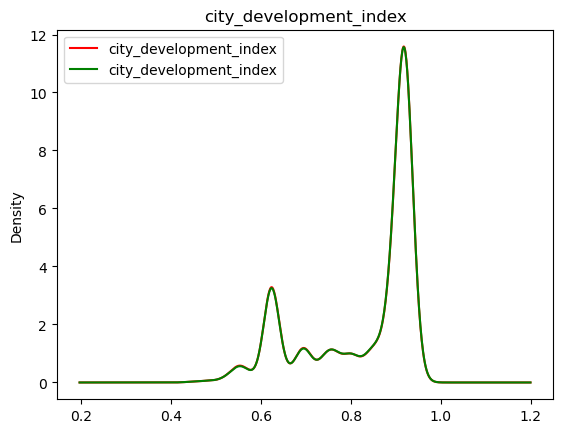

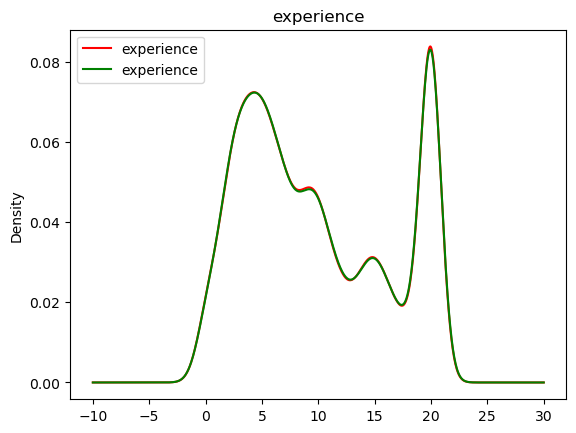

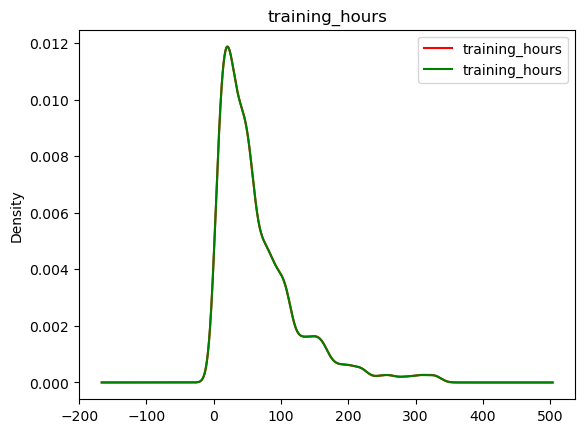

In [47]:

def pmf(df_old_one, df_new_one, column):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot histogram for the old DataFrame
    df_old_one[column].plot.density(color='red')
    
    # Plot histogram for the new DataFrame
    df_new_one[column].plot.density(color='green')

    # Adding labels and legend
    ax.set_title(f'{column}')
    ax.set_ylabel('Density')
    ax.legend()

    plt.show()

# Assuming cols_numerical is a list of numerical column names
for col in cols_numerical:
    pmf(df, df_new, column=col)


In [51]:
df[cols_categorical].sample(5)

,enrolled_university,education_level
12806,no_enrollment,Graduate
15722,no_enrollment,Masters
7956,no_enrollment,NaN
14570,no_enrollment,Graduate
10603,Full time course,Masters


In [54]:
for val in cols_categorical:
    print(df[val].value_counts())

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64


In [55]:
df_new_cols=df[cols_categorical].dropna()

In [56]:
for val in cols_categorical:
    print(df_new_cols[val].value_counts())

enrolled_university
no_enrollment       13547
Full time course     3688
Part time course     1177
Name: count, dtype: int64
education_level
Graduate          11427
Masters            4308
High School        1970
Phd                 408
Primary School      299
Name: count, dtype: int64


In [61]:
import pandas as pd

def compare_category_percentages(df_old, df_new, column):
    """
    Compare the percentage of observations per category for a specified column
    in the old and new DataFrames.

    Parameters:
    df_old (DataFrame): The original DataFrame.
    df_new (DataFrame): The new DataFrame.
    column (str): The column name to compare.

    Returns:
    DataFrame: A DataFrame containing the percentage of observations for each category.
    """
    # Calculate percentages for the original data
    original_counts = df_old[column].value_counts() / len(df_old)

    # Calculate percentages for the new data
    cca_counts = df_new[column].value_counts() / len(df_new)

    percentage=((cca_counts-original_counts)/original_counts)*100

    # Combine the results into a single DataFrame
    result = pd.concat([original_counts, cca_counts,percentage], axis=1)

    # Add column names
    result.columns = ['original', 'cca','percentage']

    return result

# Example usage:
education_comparison = compare_category_percentages(df, df_new_cols, 'education_level')
enrollment_comparison = compare_category_percentages(df, df_new_cols, 'enrolled_university')

# Display the results
print(education_comparison)
print(enrollment_comparison)


                 original       cca  percentage
education_level                                
Graduate         0.605387  0.620628    2.517575
Masters          0.227633  0.233978    2.787147
High School      0.105282  0.106995    1.627099
Phd              0.021610  0.022159    2.543710
Primary School   0.016077  0.016239    1.011233
                     original       cca  percentage
enrolled_university                                
no_enrollment        0.721213  0.735770    2.018416
Full time course     0.196106  0.200304    2.140721
Part time course     0.062533  0.063926    2.227761
